In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image

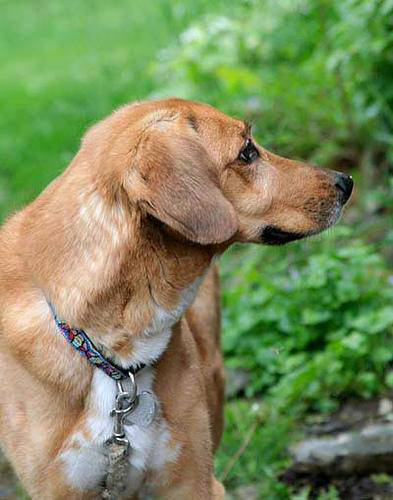

In [4]:
Image.open("dog.jpg")

In [19]:
image_path = "dog.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image,channels=3)
image = tf.image.resize(image,[256,256])
# image = tf.image.convert_image_dtype(image,dtype=tf.float32)
image = image / 255.0  

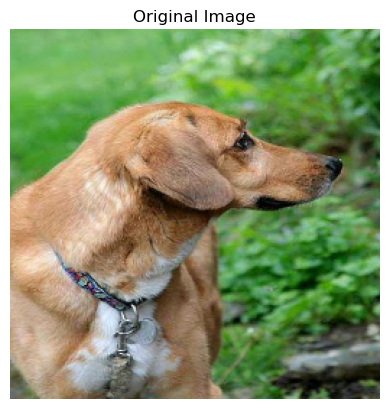

In [20]:
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

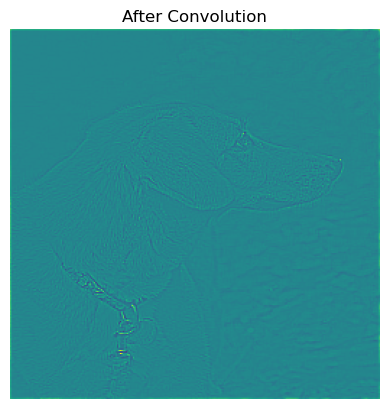

In [27]:
# Define a convolution kernel (e.g., edge detection)
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=tf.float32)

# Expand kernel dimensions to 4D: [filter_height, filter_width, in_channels, out_channels]
kernel = tf.reshape(kernel, [3, 3, 1, 1])  # shape (3, 3, 1, 1)

# Since your image has 3 channels (RGB), apply the same kernel separately to each channel
kernel = tf.repeat(kernel, repeats=3, axis=2)  # Now (3, 3, 3, 1)

# Prepare image batch
img_batch = tf.expand_dims(image, axis=0)  # [batch_size, height, width, channels]

# Apply convolution
conv_img = tf.nn.conv2d(img_batch, filters=kernel, strides=1, padding='SAME')

# Remove batch dimension
conv_img = tf.squeeze(conv_img)

# Plot
plt.imshow(conv_img.numpy())
plt.title('After Convolution')
plt.axis('off')
plt.show()

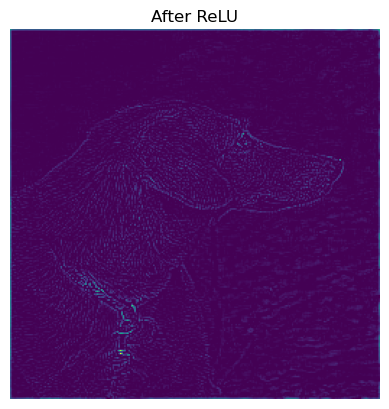

In [28]:
relu_img = tf.nn.relu(conv_img)

# Plot after ReLU
plt.imshow(relu_img.numpy())
plt.title('After ReLU')
plt.axis('off')
plt.show()

(1, 256, 256, 1)


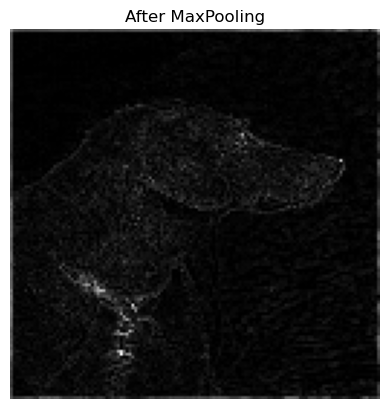

In [35]:
# Expand both batch dimension and channel dimension
relu_img_batch = tf.expand_dims(relu_img, axis=0)  # batch dimension
relu_img_batch = tf.expand_dims(relu_img_batch, axis=-1)  # channel dimension

# Now shape is [1, height, width, 1]
print(relu_img_batch.shape)  # (1, 256, 256, 1)

# Apply MaxPooling
pooled_img = tf.nn.max_pool2d(relu_img_batch, ksize=2, strides=2, padding='VALID')

# Remove batch and channel dimensions
pooled_img = tf.squeeze(pooled_img)

# Plot
plt.imshow(pooled_img.numpy(), cmap='gray')  # Show as grayscale
plt.title('After MaxPooling')
plt.axis('off')
plt.show()